In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
"""
Here I'm going to compare New Jersey and Missouri, which are on two side
of the spectrum in terms of local property tax revenue per student
 vs. per student spending.
"""

"\nHere I'm going to compare New Jersey and Missouri, which are on two side\nof the spectrum in terms of local property tax revenue per student\n vs. per student spending.\n"

In [6]:
df = pd.read_csv("2023_census_school_finance_data.csv")

In [7]:
df.head()

,STATE,PID6,UNIT_TYPE,FIPST,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,...,PPSALWG,PPEMPBEN,PPITOTAL,PPISALWG,PPIEMBEN,PPSTOTAL,PPSPUPIL,PPSSTAFF,PPSGENAD,PPSSCHAD
0,1,100191,5,1,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,...,7349.0,2589.0,7544.0,4811.0,1654.0,4915.0,798.0,597.0,198.0,819.0
1,1,100192,5,1,ONEONTA CITY SCHOOL DISTRICT,1009,142,13820,3,0102550,...,6515.0,2311.0,6962.0,4411.0,1520.0,4019.0,728.0,581.0,433.0,700.0
2,1,100193,5,1,PIEDMONT CITY SCHOOL DISTRICT,1015,N,11500,3,0102760,...,6813.0,2333.0,6798.0,4610.0,1559.0,3868.0,796.0,452.0,762.0,691.0
3,1,100194,5,1,CHOCTAW COUNTY SCHOOL DISTRICT,1023,N,N,3,0100690,...,8533.0,3272.0,6965.0,4442.0,1628.0,8861.0,1336.0,1802.0,1058.0,851.0
4,1,100195,5,1,COOSA COUNTY SCHOOL DISTRICT,1037,388,10760,3,0100900,...,7901.0,3070.0,7320.0,4292.0,1598.0,6932.0,1130.0,761.0,825.0,901.0


In [8]:
df.columns

Index(['STATE', 'PID6', 'UNIT_TYPE', 'FIPST', 'NAME', 'CONUM', 'CSA', 'CBSA',
       'SCHLEV', 'NCESID', 'YRDATA', 'ENROLL', 'TOTALREV', 'TFEDREV',
       'FEDRCOMP', 'FEDRSPEC', 'FEDRNUTR', 'FEDROTHR', 'TSTREV', 'STRFORM',
       'STRSPEC', 'STRTRANS', 'STROTHR', 'TLOCREV', 'LOCRTAX', 'LOCRPROP',
       'LOCRPAR', 'LOCRCICO', 'LOCROSCH', 'LOCRCHAR', 'LOCROTHR', 'TOTALEXP',
       'TCURSPND', 'TSALWAGE', 'TEMPBENE', 'TCURINST', 'TCURISAL', 'TCURIBEN',
       'TCURSSVC', 'TCURSPUP', 'TCURSSTA', 'TCURSGEN', 'TCURSSCH', 'TCURSOTH',
       'TCURONON', 'TCAPOUT', 'TPAYOTH', 'TINTRST', 'DEBTOUT', 'LONGISSU',
       'LONGRET', 'PCTTOTAL', 'PCTFTOT', 'PCTFCOMP', 'PCTSTOT', 'PCTSFORM',
       'PCTLTOT', 'PCTLTAXP', 'PCTLOTHG', 'PCTLCHAR', 'PPCSTOT', 'PPSALWG',
       'PPEMPBEN', 'PPITOTAL', 'PPISALWG', 'PPIEMBEN', 'PPSTOTAL', 'PPSPUPIL',
       'PPSSTAFF', 'PPSGENAD', 'PPSSCHAD'],
      dtype='object')

In [9]:
"""
OK, so first, I need to filter by FIPST which is the Federal 
Information Processing Standards State Code. The FIPST for New Jersey is 34.

Next, I want to filter out by school level = 3, which is elementary-secondary.
"""

df_nj = df[(df['FIPST'] == 34) & (df['SCHLEV'] == 3)]
df_mo = df[(df['FIPST'] == 29) & (df['SCHLEV'] == 3)]

In [10]:
df_nj.head(3)

,STATE,PID6,UNIT_TYPE,FIPST,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,...,PPSALWG,PPEMPBEN,PPITOTAL,PPISALWG,PPIEMBEN,PPSTOTAL,PPSPUPIL,PPSSTAFF,PPSGENAD,PPSSCHAD
7787,31,109097,2,34,TRENTON SCHOOL DISTRICT,34021,408,45940,3,3416290,...,9258.0,6114.0,13164.0,5864.0,4201.0,9440.0,2647.0,707.0,205.0,1386.0
7794,31,109254,5,34,FAIR LAWN SCH DIST,34003,408,35620,3,3404980,...,12294.0,7090.0,14105.0,8219.0,4914.0,8303.0,2981.0,593.0,188.0,1283.0
7795,31,109255,5,34,HASBROUCK HEIGHTS BORO SCHOOL DIST,34003,408,35620,3,3406930,...,12228.0,7563.0,14601.0,7999.0,5189.0,8637.0,3257.0,639.0,448.0,1196.0


In [11]:
df_mo.head(3)

,STATE,PID6,UNIT_TYPE,FIPST,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,...,PPSALWG,PPEMPBEN,PPITOTAL,PPISALWG,PPIEMBEN,PPSTOTAL,PPSPUPIL,PPSSTAFF,PPSGENAD,PPSSCHAD
6391,26,108037,5,29,ADAIR COUNTY SCHOOL DISTRICT R 1,29001,N,28860,3,2922980,...,7685.0,2534.0,7897.0,5254.0,1733.0,5030.0,677.0,336.0,1220.0,547.0
6392,26,108038,5,29,COMMUNITY SCH DIST R 6,29007,190,33020,3,2910020,...,8092.0,2465.0,7725.0,5241.0,1636.0,5196.0,756.0,494.0,1241.0,453.0
6393,26,108039,5,29,MEXICO SCH DIST 59,29007,190,33020,3,2920810,...,7081.0,2076.0,6577.0,4606.0,1330.0,4548.0,647.0,331.0,1123.0,637.0


In [12]:
""" 
Now, that you have the data filtered, let's trim down the dataset so we only
include the columns we need, which are:

The X-Axis: Local Tax Revenue per Student You need to combine the two 
"buckets" we discussed (Type 1 & Type 2) and divide by students.

Property Tax (Type 2 / Suburbs): Use LOCRPROP.

(This stands for "Local Revenue - Property Tax")

Parent Govt Contribution (Type 1 / Cities): Use LOCRPAR.

(This stands for "Local Revenue - Parent Government")

Students: Use ENROLL.

Your X-Axis Formula: (df['LOCRPROP'] + df['LOCRPAR']) / df['ENROLL']

The Y-Axis: Spending per Student Your dataset actually has this pre-calculated! You don't need to do the math yourself.

Spending Variable: Use PPCSTOT.

(This stands for "Per Pupil Current Spending - Total")
"""

' \nNow, that you have the data filtered, let\'s trim down the dataset so we only\ninclude the columns we need, which are:\n\nThe X-Axis: Local Tax Revenue per Student You need to combine the two \n"buckets" we discussed (Type 1 & Type 2) and divide by students.\n\nProperty Tax (Type 2 / Suburbs): Use LOCRPROP.\n\n(This stands for "Local Revenue - Property Tax")\n\nParent Govt Contribution (Type 1 / Cities): Use LOCRPAR.\n\n(This stands for "Local Revenue - Parent Government")\n\nStudents: Use ENROLL.\n\nYour X-Axis Formula: (df[\'LOCRPROP\'] + df[\'LOCRPAR\']) / df[\'ENROLL\']\n\nThe Y-Axis: Spending per Student Your dataset actually has this pre-calculated! You don\'t need to do the math yourself.\n\nSpending Variable: Use PPCSTOT.\n\n(This stands for "Per Pupil Current Spending - Total")\n'

In [13]:
# Filter out the columns we don't care about.
df_nj = df_nj[[
    'FIPST',
    'NAME',
    'SCHLEV',
    'LOCRPROP',
    'LOCRPAR',
    'ENROLL',
    'PPCSTOT'
]]

df_mo = df_mo[[
    'FIPST',
    'NAME',
    'SCHLEV',
    'LOCRPROP',
    'LOCRPAR',
    'ENROLL',
    'PPCSTOT'
]]

In [14]:
df_nj['Local Tax Revenue per Student (Thousands)'] = (df_nj['LOCRPROP'] + df_nj['LOCRPAR']) / df_nj['ENROLL']
df_nj['per Student Spending (Thousands)'] = (df_nj['PPCSTOT'] / 1000)

df_mo['Local Tax Revenue per Student (Thousands)'] = (df_mo['LOCRPROP'] + df_mo['LOCRPAR']) / df_mo['ENROLL']
df_mo['per Student Spending (Thousands)'] = (df_mo['PPCSTOT'] / 1000)

In [15]:
df_nj.head(3)

,FIPST,NAME,SCHLEV,LOCRPROP,LOCRPAR,ENROLL,PPCSTOT,Local Tax Revenue per Student (Thousands),per Student Spending (Thousands)
7787,34,TRENTON SCHOOL DISTRICT,3,0,25433,14852,23249.0,1.712429,23.249
7794,34,FAIR LAWN SCH DIST,3,97245,0,5529,23164.0,17.588171,23.164
7795,34,HASBROUCK HEIGHTS BORO SCHOOL DIST,3,32807,0,1744,23846.0,18.811353,23.846


In [16]:
df_mo.head(3)

,FIPST,NAME,SCHLEV,LOCRPROP,LOCRPAR,ENROLL,PPCSTOT,Local Tax Revenue per Student (Thousands),per Student Spending (Thousands)
6391,29,ADAIR COUNTY SCHOOL DISTRICT R 1,3,1070,0,232,13556.0,4.612069,13.556
6392,29,COMMUNITY SCH DIST R 6,3,2314,0,316,13408.0,7.322785,13.408
6393,29,MEXICO SCH DIST 59,3,13403,0,2462,11582.0,5.443948,11.582


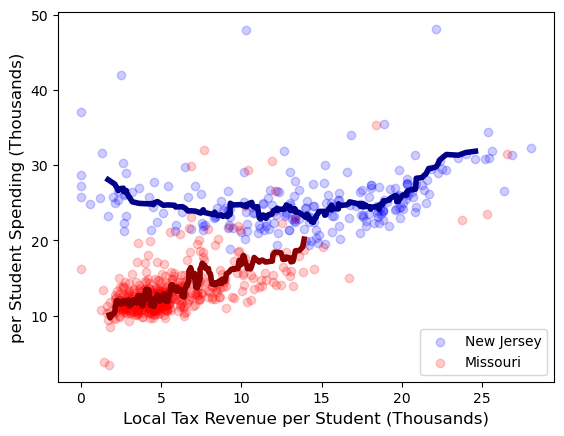

In [17]:

# Make the scatter plot with moving averages
plt.scatter(
    df_nj['Local Tax Revenue per Student (Thousands)'],
    df_nj['per Student Spending (Thousands)'],
    color = 'Blue', label = 'New Jersey', alpha = 0.2)
plt.scatter(
    df_mo['Local Tax Revenue per Student (Thousands)'],
    df_mo['per Student Spending (Thousands)'],
    color = 'Red', label = 'Missouri', alpha = 0.2)
plt.xlabel('Local Tax Revenue per Student (Thousands)', fontsize = 12)
plt.ylabel('per Student Spending (Thousands)', fontsize = 12)
plt.legend(loc = 'lower right')

def plot_moving_average(dataframe, color, label):
    # Sort the specific dataframe passed in
    sorted_df = dataframe.sort_values('Local Tax Revenue per Student (Thousands)')
    
    # Calculate rolling mean
    sorted_df['Rolling_Spend'] = sorted_df['per Student Spending (Thousands)'].rolling(window=15, center=True).mean()
    
    # Plot
    plt.plot(sorted_df['Local Tax Revenue per Student (Thousands)'], sorted_df['Rolling_Spend'], 
             color=color, linewidth=4, label=f'{label} Trend')

plot_moving_average(df_nj, 'darkblue', 'New Jersey')
plot_moving_average(df_mo, 'darkred', 'Missouri')


plt.savefig('nj_vs_mo.png',dpi = 1000)


In [18]:
df_mo.loc[df_mo['per Student Spending (Thousands)'].idxmin()]

FIPST                                                              29
NAME                                         STURGEON SCHOOL DIST R-5
SCHLEV                                                              3
LOCRPROP                                                         2566
LOCRPAR                                                             0
ENROLL                                                           1445
PPCSTOT                                                        3439.0
Local Tax Revenue per Student (Thousands)                    1.775779
per Student Spending (Thousands)                                3.439
Name: 6574, dtype: object

In [19]:
df_mo.loc[df_mo['per Student Spending (Thousands)'].idxmax()]

FIPST                                                               29
NAME                                         MISSOURI CITY SCH DIST 56
SCHLEV                                                               3
LOCRPROP                                                           349
LOCRPAR                                                              0
ENROLL                                                              19
PPCSTOT                                                        35316.0
Local Tax Revenue per Student (Thousands)                    18.368421
per Student Spending (Thousands)                                35.316
Name: 6469, dtype: object